# Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from   tensorflow.keras import models, layers, datasets

# Loading the dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Shape of the datasets

In [3]:
print("Input training data shape:", X_train.shape)
print("Input testing data shape:", X_test.shape)



print("Output training data shape:", Y_train.shape)
print("Output testing data shape:", Y_test.shape)

Input training data shape: (50000, 32, 32, 3)
Input testing data shape: (10000, 32, 32, 3)
Output training data shape: (50000, 1)
Output testing data shape: (10000, 1)


In [4]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
# Reshape the column of Y_train into one row
Y_train = Y_train.reshape(-1,)
print(Y_train)

[6 9 9 ... 9 1 1]


In [6]:
print(Y_train[:5])

[6 9 9 4 1]


# Plotting of the dataset images

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
# plotting the images at different index position of the dataset
def plot_sample(X,Y,index):
    # depicting the size of the figure
    plt.figure(figsize= (18,5))
    # displaying the image
    plt.imshow(X[index])
    # depicting the x label of the figure
    plt.xlabel(classes[Y[index]])

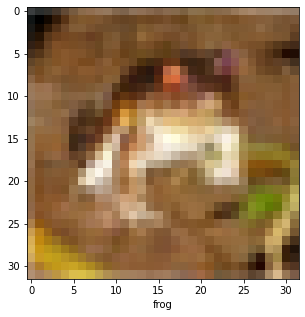

In [9]:
plot_sample(X_train, Y_train,0)

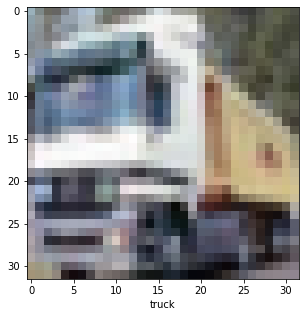

In [10]:
plot_sample(X_train, Y_train, 1)

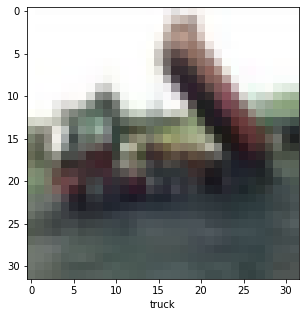

In [11]:
plot_sample(X_train, Y_train, 2)

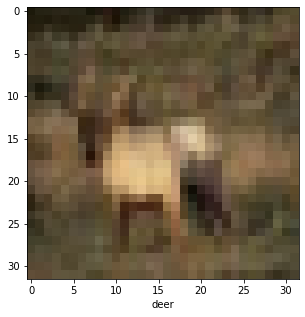

In [12]:
plot_sample(X_train, Y_train, 3)

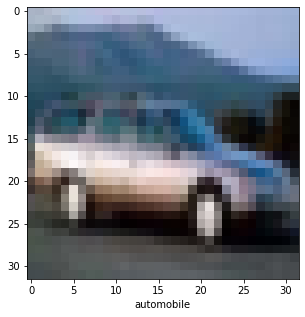

In [13]:
plot_sample(X_train, Y_train, 4)

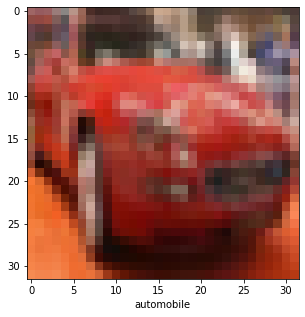

In [14]:
plot_sample(X_train, Y_train,5)

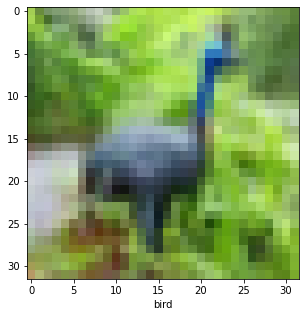

In [15]:
plot_sample(X_train, Y_train,6)

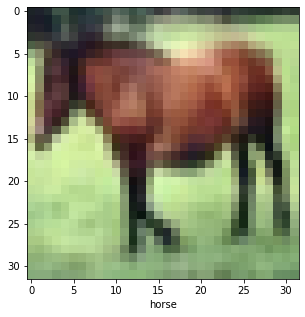

In [16]:
plot_sample(X_train, Y_train,7)

# NORMALIZING THE TRAINING DATA

In [17]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [18]:
print(X_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [19]:
X_train = X_train / 255
X_test  = X_test / 255
print(X_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [20]:
print(X_test)

[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

In [21]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# BUILD AN ANN MODEL TO PREDICT THE ACCURACY FOR CIFAR IMAGE DATASET

In [22]:
# Build an ann model
ann = models.Sequential([
    # define the input layer
    layers.Flatten(input_shape = (32,32,3)),
    # define the first hidden layer
    layers.Dense(3000, activation = 'relu'),
    # define the second hidden layer
    layers.Dense(1000, activation = 'relu'),
    # define the output layer
    layers.Dense(10, activation = 'sigmoid')
])

# COMPILE THE ANN MODEL

In [23]:
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# TRAIN THE ANN MODEL

In [24]:
ann.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.8125 - accuracy: 0.3535
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6236 - accuracy: 0.4271
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5428 - accuracy: 0.4566
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4806 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4299 - accuracy: 0.49601s
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3897 - accuracy: 0.5121
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3495 - accuracy: 0.5258
Epoch 8/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3135 - accuracy: 0.5382
Epoch 9/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2808 - accuracy: 0.5516
Epoch 10/10
1563/1563 [==============================] - 74s 4

# SUMMARY OF ANN MODEL

In [33]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


# EVALUATE THE ANN MODEL

In [34]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.3866 - accuracy: 0.5048


[1.3865779638290405, 0.504800021648407]

# LOSS AND ACCURACY OF ANN MODEL

In [35]:
loss , accuracy = ann.evaluate(X_test, Y_test, verbose = 0)

print("Loss value of ann model is:", loss)
print("Accuracy of ann model is:", (accuracy  * 100.0))

Loss value of ann model is: 1.3865779638290405
Accuracy of ann model is: 50.4800021648407


# CLASSIFICATION REPORT FOR ANN MODEL

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# To find the predicted value
pred_y = ann.predict(X_test)

# To find the predicted classes of output
pred_classes_y = [np.argmax(i) for i in pred_y]
print(pred_classes_y)

[3, 8, 8, 8, 4, 6, 3, 4, 3, 1, 8, 9, 1, 7, 1, 8, 3, 0, 8, 6, 1, 0, 0, 1, 4, 6, 6, 0, 1, 6, 6, 4, 4, 5, 9, 1, 6, 8, 1, 8, 0, 6, 3, 3, 0, 8, 5, 8, 4, 2, 9, 8, 6, 3, 8, 8, 7, 8, 8, 3, 7, 6, 1, 9, 6, 2, 1, 2, 3, 9, 4, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 8, 2, 7, 2, 8, 8, 8, 8, 4, 8, 6, 4, 5, 4, 0, 0, 7, 5, 4, 6, 3, 1, 1, 5, 6, 8, 7, 0, 0, 6, 2, 1, 1, 0, 8, 2, 5, 8, 4, 8, 2, 8, 2, 8, 5, 3, 0, 4, 1, 8, 9, 1, 3, 9, 7, 2, 8, 3, 5, 3, 5, 8, 2, 6, 5, 7, 3, 8, 9, 8, 8, 0, 5, 2, 8, 3, 0, 0, 1, 7, 4, 8, 7, 8, 6, 7, 0, 0, 0, 1, 8, 1, 9, 8, 7, 3, 8, 1, 7, 6, 8, 5, 8, 6, 3, 7, 8, 2, 3, 3, 1, 7, 4, 8, 8, 7, 8, 5, 8, 8, 7, 1, 6, 0, 2, 7, 8, 5, 1, 3, 7, 8, 5, 8, 8, 0, 7, 7, 6, 1, 3, 3, 9, 3, 2, 3, 3, 3, 1, 2, 1, 8, 0, 4, 0, 3, 5, 1, 1, 7, 8, 0, 1, 7, 8, 2, 1, 0, 3, 6, 1, 2, 0, 3, 0, 8, 1, 8, 8, 3, 3, 0, 8, 8, 4, 7, 0, 2, 3, 6, 5, 8, 3, 0, 2, 7, 5, 9, 1, 3, 1, 8, 9, 8, 8, 0, 9, 1, 2, 4, 8, 3, 2, 6, 0, 0, 2, 6, 6, 2, 2, 6, 8, 8, 2, 1, 2, 8, 6, 0, 0, 2, 0, 3, 7, 5, 3, 5, 5, 6, 2, 6, 9, 4, 5, 0, 3, 8, 9, 6, 

In [37]:
# To find out the confusion matrix
confusion_matrix(Y_test, pred_classes_y)

array([[577,  34,  30,  19,  21,  11,  20,  23, 259,   6],
       [ 41, 659,   4,  25,   1,  12,  15,  20, 175,  48],
       [108,  19, 380, 104,  77,  79,  97,  69,  60,   7],
       [ 48,  35,  57, 370,  33, 174, 124,  58,  80,  21],
       [ 76,  20, 165,  84, 335,  39, 128,  80,  72,   1],
       [ 40,  16,  81, 198,  42, 387,  69,  87,  69,  11],
       [ 16,  17,  71,  95,  61,  48, 621,  24,  41,   6],
       [ 47,  23,  41,  80,  47,  62,  26, 593,  58,  23],
       [ 71,  51,   6,  23,   7,   9,   7,   7, 804,  15],
       [ 56, 271,   9,  42,   4,  20,  15,  38, 223, 322]], dtype=int64)

In [38]:
# To find out the classification report
classification_report(Y_test, pred_classes_y)

'              precision    recall  f1-score   support\n\n           0       0.53      0.58      0.55      1000\n           1       0.58      0.66      0.61      1000\n           2       0.45      0.38      0.41      1000\n           3       0.36      0.37      0.36      1000\n           4       0.53      0.34      0.41      1000\n           5       0.46      0.39      0.42      1000\n           6       0.55      0.62      0.59      1000\n           7       0.59      0.59      0.59      1000\n           8       0.44      0.80      0.57      1000\n           9       0.70      0.32      0.44      1000\n\n    accuracy                           0.50     10000\n   macro avg       0.52      0.50      0.50     10000\nweighted avg       0.52      0.50      0.50     10000\n'

# USE THE CNN MODEL FOR CIFAR IMAGE CLASSIFICATION

In [45]:
from keras.layers import Dropout, Flatten
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D

In [46]:
# Build a cnn model
cnn = models.Sequential([
    # add the first convolution layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    # add the MaxPooling layer
    MaxPooling2D((2,2)),
    
    # add the second convolution layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    # add the Max Pooling layer
    MaxPooling2D((2,2)),
    
    # Perform the Dropout layer to reduce the number of neurons
    Dropout(0.5),
    
    # Perform the Flatten operation to bring all the Max pooled outputs in onr vector
    Flatten(),
    
    # Add the dense layer to the CNN Model
    Dense(64, activation = 'relu'),
    
    # Add the second dense layer to the CNN Model
    Dense(10, activation = 'sigmoid')
])

# COMPILE THE CNN MODEL

In [47]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# TRAIN THE CNN MODEL

In [48]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5805 - accuracy: 0.4268
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3101 - accuracy: 0.5323
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2086 - accuracy: 0.5724
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1344 - accuracy: 0.5976
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0794 - accuracy: 0.61840s - loss: 1.0795 - accuracy: 0.
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0375 - accuracy: 0.6349
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9971 - accuracy: 0.6483
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9739 - accuracy: 0.6559
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9417 - accuracy: 0.6671
Epoch 10/10
1563/1563 [=========

# SUMMARY OF CNN MODEL

In [49]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

# EVALUATE THE CNN KODEL

In [50]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.8752 - accuracy: 0.6951


[0.8751881122589111, 0.6951000094413757]

# LOSS AND ACCURACY OF CNN MODEL

In [51]:
loss, accuracy = cnn.evaluate(X_test, Y_test, verbose = 0)

print("Loss for the model is:", loss)
print("Accuracy for the model is:", (accuracy * 100))

Loss for the model is: 0.8751881122589111
Accuracy for the model is: 69.51000094413757


# CLASSIFICATION REPORT FOR CNN MODEL

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

pred_y = cnn.predict(X_test)

# To get the predicted value for all outputs
pred_class_y = [np.argmax(i) for i in pred_y]

# To get the classification report between the actual output and predicted output
classification_report(Y_test, pred_class_y)

'              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.74      1000\n           1       0.82      0.84      0.83      1000\n           2       0.63      0.55      0.59      1000\n           3       0.52      0.45      0.48      1000\n           4       0.71      0.54      0.61      1000\n           5       0.52      0.70      0.60      1000\n           6       0.76      0.79      0.78      1000\n           7       0.75      0.72      0.73      1000\n           8       0.82      0.80      0.81      1000\n           9       0.75      0.80      0.77      1000\n\n    accuracy                           0.70     10000\n   macro avg       0.70      0.70      0.69     10000\nweighted avg       0.70      0.70      0.69     10000\n'

In [53]:
# To get the confusion matrix between the actual output and predicted output
confusion_matrix(Y_test, pred_class_y)

array([[772,  24,  46,  17,   9,   7,   8,   8,  57,  52],
       [ 26, 837,   2,   7,   1,   4,   8,   2,  22,  91],
       [ 66,   9, 552,  58,  64, 126,  61,  33,  15,  16],
       [ 28,   7,  64, 445,  54, 273,  57,  37,  14,  21],
       [ 41,   5,  89,  76, 535,  72,  79,  82,  11,  10],
       [ 16,   5,  37, 133,  20, 699,  23,  51,  11,   5],
       [  4,   8,  42,  64,  19,  40, 792,  11,  12,   8],
       [ 15,   5,  29,  40,  43, 104,   3, 717,   6,  38],
       [ 93,  32,  14,  14,   2,   9,   3,   4, 799,  30],
       [ 35,  89,   7,  10,   2,   9,   7,  11,  27, 803]], dtype=int64)

# PLOTTING THE TEST VALUES

In [54]:
print(X_test)

[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

In [55]:
print(Y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [56]:
# reshape the y-test values
Y_test = Y_test.reshape(-1,)
print(Y_test)

[3 8 8 ... 5 1 7]


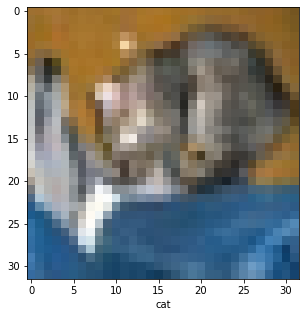

In [57]:
plot_sample(X_test, Y_test,0)

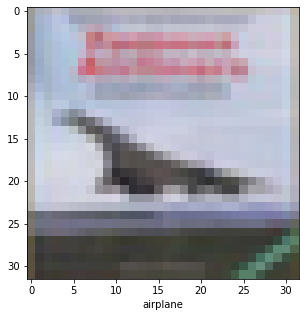

In [58]:
plot_sample(X_test, Y_test,3)